In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../data/fashion-mnist/utils')
import mnist_reader

In [2]:
def Get_Neighbors(distance_list, esp):
    N = np.argwhere(distance_list <= esp).ravel()
    return list(N)

In [3]:
def Get_Clusters(distance, esp, minPoints, cluster):
    C = 0
    for x in range(len(cluster)):
        if not np.isnan(cluster[x]):
            continue
        N = Get_Neighbors(distance[x], esp)
        if len(N) < minPoints:
            cluster[x] = -1
            continue
        C = C + 1
        cluster[x] = C
        N.remove(x)
        S = list(N)
        for nb in S:
            if cluster[nb] == -1:
                cluster[nb] = C
            if not np.isnan(cluster[nb]):
                continue
            cluster[nb] = C
            N = Get_Neighbors(distance[nb], esp)
            if len(N) >= minPoints:
                S.extend(N)
    return list(cluster)

In [51]:
def Find_Gini_Purity(target_cluster, predicted_cluster):
    matrix = confusion_matrix(target_cluster, predicted_cluster)
    matrix = matrix[:, 1:]
    N = []
    M = []
    P = []
    rows = matrix.shape[0]
    
    columns = matrix.shape[1]

    for i in range(rows):
        N.append(sum(matrix[i]))
    
    for j in range(columns):
        M.append(sum(matrix[:,j]))

    for j in range(columns):
        P.append(max(matrix[:,j]))

    Purity = sum(P) / sum(M)
    return Purity

In [5]:
newsgroups = fetch_20newsgroups(subset='all', data_home='../data/')
vectortype = TfidfVectorizer(stop_words='english')
news_group_vector = vectortype.fit_transform(newsgroups.data)
news_group_target = newsgroups.target
news_group_dist = euclidean_distances(news_group_vector)

In [63]:
news_group_clusters = [np.nan for i in range(news_group_vector.shape[0])]
news_group_minPoints = 50
news_group_esp = 1.234006
news_group_pred = Get_Clusters(news_group_dist, news_group_esp, news_group_minPoints, news_group_clusters)
print("Purity :", Find_Gini_Purity(news_group_target, news_group_pred) )
print("Eps :", news_group_esp)
print("No. of cluster :", len(np.unique(news_group_pred)))
print("Silhouette score :", silhouette_score(news_group_dist, news_group_pred, metric='precomputed'))

Purity : 0.680667078443
Eps : 1.234006
No. of cluster : 23
Silhouette score : -0.00143525930775


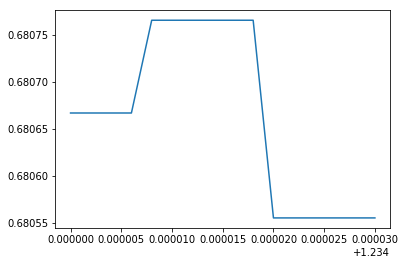

In [58]:
plt.plot(elist,plist)
plt.show()

In [70]:
np.unique(news_group_pred, return_counts=True)

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([15608,   194,   768,   115,   176,   234,   146,    55,   143,
          257,   112,   140,   239,   148,    49,    50,    51,    59,
           57,    58,    90,    46,    51]))

In [60]:
fashion_data, fashion_target = mnist_reader.load_mnist('../data/fashion-mnist/data/fashion')
fashion_distance = cosine_distances(fashion_data)

In [68]:
fashion_clusters = [np.nan for i in range(fashion_data.shape[0])]
fashion_esp = 0.026
fashion_minPoints = 20
fashion_pred = Get_Clusters(fashion_distance, fashion_esp, 
                               fashion_minPoints, fashion_clusters)
print("Purity :", Find_Gini_Purity(fashion_target, fashion_pred))
print("Eps :", esp)
print("No. of cluster :", len(np.unique(fashion_pred)))

Purity : 0.677580813347
Eps : 0.0295
No. of cluster : 12


In [69]:
np.unique(fashion_pred, return_counts=True)

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([45615,  2300,  7087,  3622,   960,   226,    82,    25,    21,
           21,    21,    20]))

In [89]:
house_data = open('../data/household_power_consumption.txt', 'r')
house_data.readline()
house_list = []
for line in house_data.readlines():
    try:
        house_list.append([float(x) for x in line[:-2].split(';')[2:]])
    except Exception:
        continue
house_list = np.asarray(house_list)

In [112]:
rand = np.random.RandomState(7)
house_data_sample = rand.permutation(house_list)[:20000]
sc = StandardScaler()
house_data_sample = sc.fit_transform(house_data_sample)
house_distance = euclidean_distances(house_data_sample)

In [115]:
house_clusters = [np.nan for i in range(house_data_sample.shape[0])]
house_esp = 0.5
house_minPoints = 40
house_pred = Get_Clusters(house_distance, house_esp, 
                               house_minPoints, house_clusters)

print("No. of cluster :", len(np.unique(house_pred)))

No. of cluster : 4


In [116]:
np.unique(house_pred, return_counts=True)

(array([-1,  1,  2,  3]), array([ 3169, 11867,  4835,   129]))